**Group number**  
3

**Group members**  
Alexander Stoustrup  
Mathias Tyranski  
Benjamin Simonsen

In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.signal as si
import sympy as sp
import control as ct
from typing import List
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math, Image

def eq_disp(varstring, expr, unit=""):
    display(Latex(f"${varstring}={sp.latex(expr)} \: {unit}$"))
    
def reduce_feedback(G_fwd, G_bwd):
    """Assumes feedback is deducted from signal, if not
    change sign of feedback"""
    return sp.simplify(G_fwd/(1+G_fwd*G_bwd))

def RHarray(coeffs: List):
    # first 2 rows from coefficients
    n = len(coeffs)
    arr = sp.zeros(n, n//2+2)
    i = 0
    for i in range(0,n,2):
        arr[0, i//2] = coeffs[i]
    for i in range(1,n,2):
        arr[1, i//2] = coeffs[i]

    for j in range(2, arr.shape[0]):
        for i in range(arr.shape[1]-1):
            a0 = arr[j-2,0]
            a3 = a1 = arr[j-1,i+1]
            a1 = arr[j-1,0]
            a2 = arr[j-2,i+1]
            arr[j, i] = (a1*a2-a0*a3)/a1
    return arr

# E7.5

In [3]:
s = sp.symbols('s')
L = (s**2 + 2*s + 10)/(s**4 + 38*s**3 + 515*s**2 + 2950*s + 6000)
eq_disp('L(s)', L)

T = reduce_feedback(L, 1)
eq_disp('T(s)', T)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

And the $P(s)$ of the system is

In [4]:
P = L
eq_disp('P(s)', P)

<IPython.core.display.Latex object>

Create transfer function

In [5]:
s = ct.tf('s')
T = (s**2 + 2*s + 10)/(s**4 + 38*s**3 + 516*s**2 + 2952*s +6010)
P = (s**2 + 2*s + 10)/(s**4 + 38*s**3 + 515*s**2 + 2950*s +6000)

## a)

Plotting the Root Locus

In [6]:
fig, ax = plt.subplots(figsize=(9, 5))

rlist, klist = ct.rlocus(P)

The breakaway points are read from the Root Locus

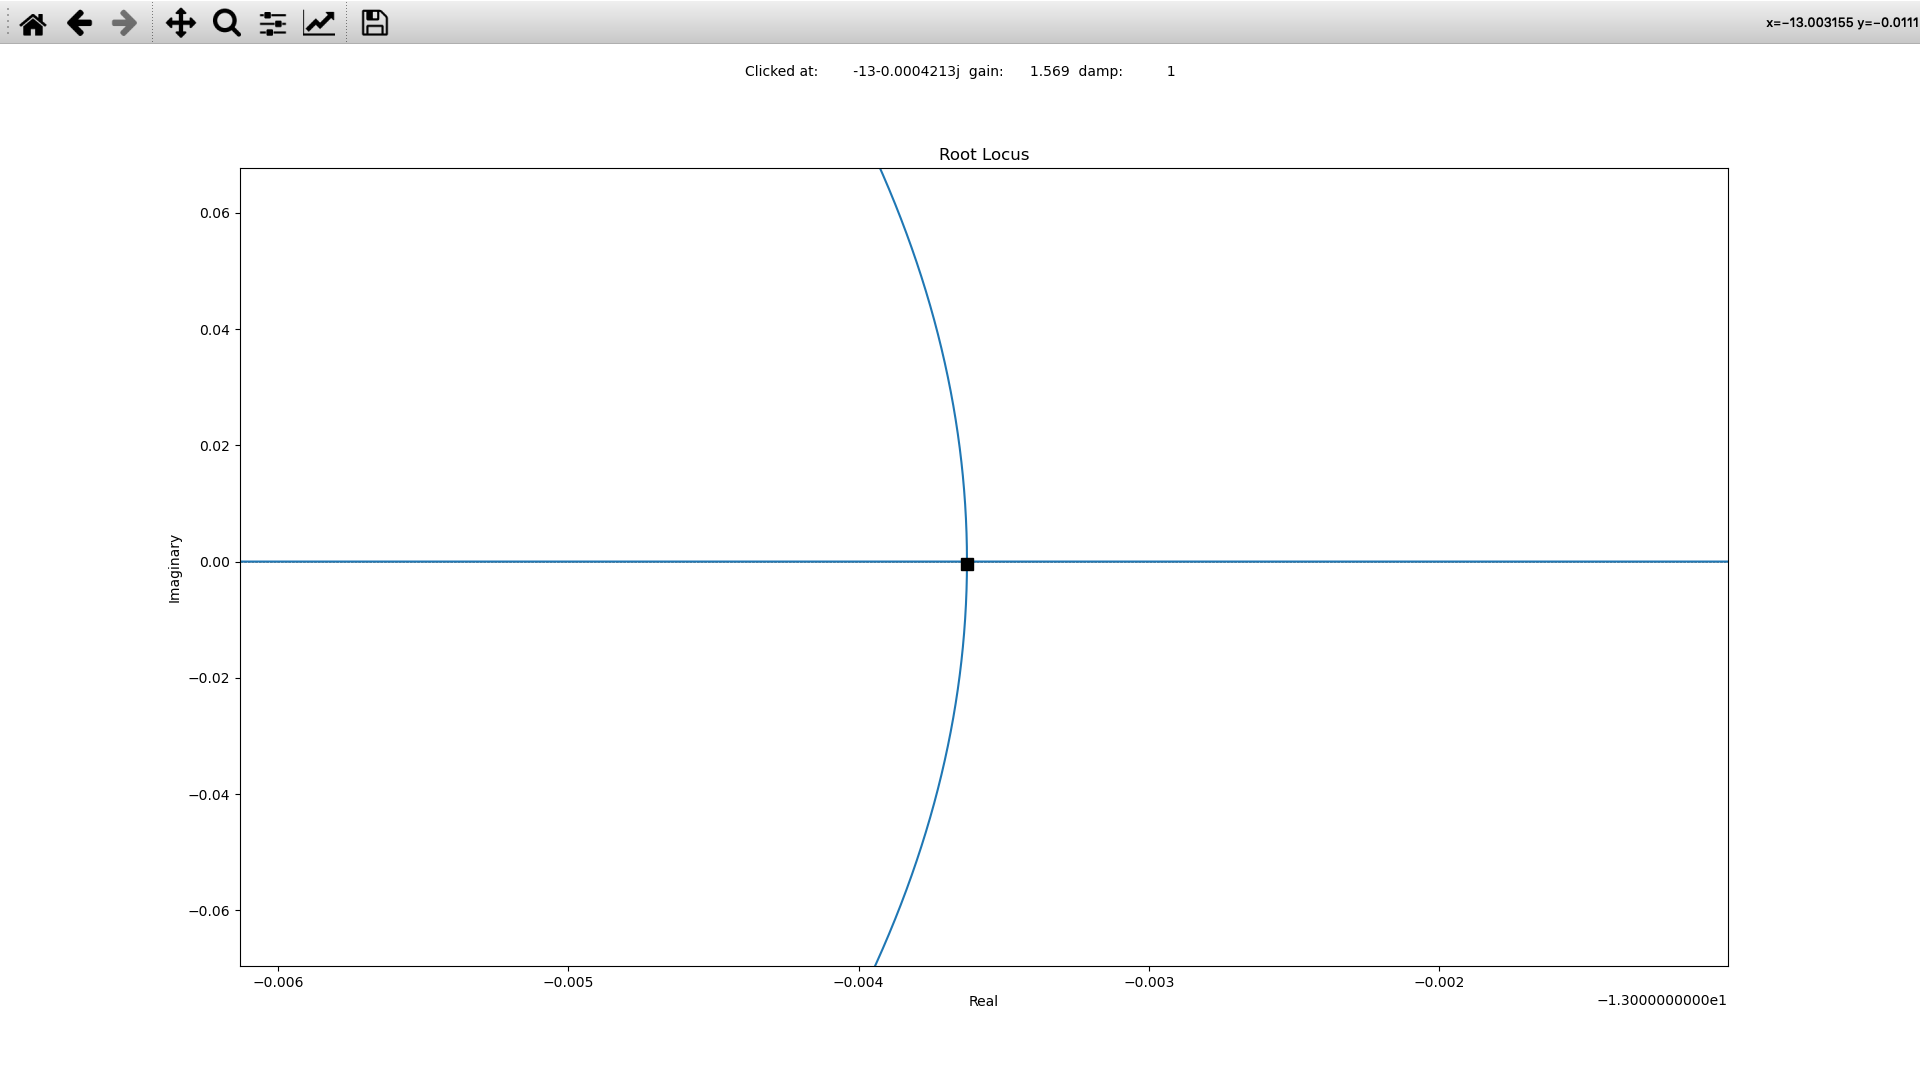

In [7]:
Image('plots/breakaway1.png')

In [8]:
bp1 = (-13.0,0)

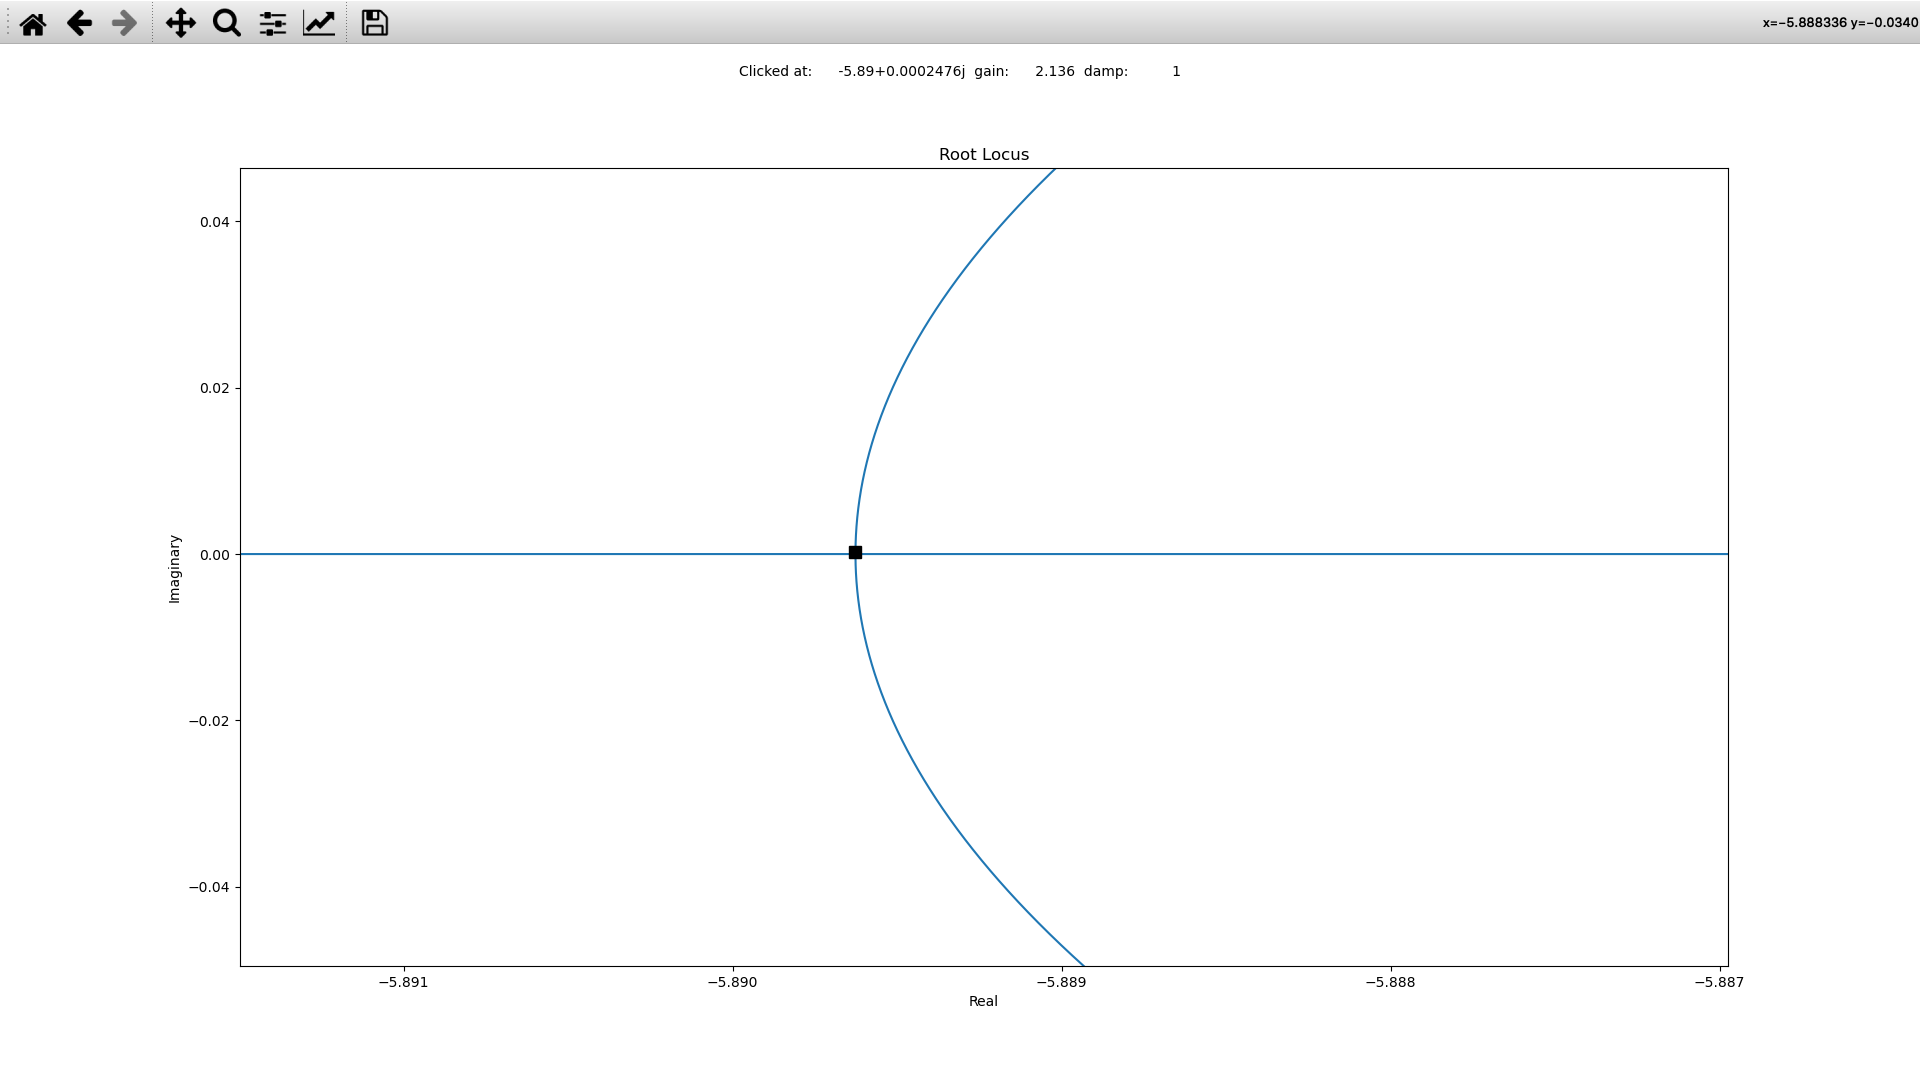

In [9]:
Image('plots/breakaway2.png')

In [10]:
bp2 = (-5.89,0)

So the breakaway points are

In [11]:
eq_disp('bp_1', bp1)
eq_disp('bp_2', bp2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## b)

In [12]:
eq_disp('P(s)', P)

<IPython.core.display.Latex object>

In [13]:
zeros = P.zeros()
poles = P.poles()
n = poles.size
M = zeros.size

eq_disp('z_i', zeros)
eq_disp('p_k', poles)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Compute the asymptote centroid

In [14]:
sigma_A = (sum(poles) - sum(zeros))/(n-M)
eq_disp('\\sigma_A', np.round(sigma_A,3))

<IPython.core.display.Latex object>

The angle of the asymptotes

In [15]:
phi_A = (2*0 + 1)/(n - M)*180
eq_disp('\\phi_A', phi_A, '^\\circ')

<IPython.core.display.Latex object>

or

In [15]:
eq_disp('\\phi_A', -phi_A, '^\\circ')

<IPython.core.display.Latex object>

## c)

The gains at the breakway points can be read from the Root Locus in question a)

In [16]:
K_bp1 = 1.57
K_bp2 = 2.14

eq_disp('K_{bp1}', K_bp1)
eq_disp('K_{bp2}', K_bp2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# E7.9

In [17]:
D = 10
n_segments = 36
s, K = sp.symbols('s, K')

L = K/(s*(s**2 + 2*s + 5))

P = L/K
eq_disp('P(s)', P)

T = reduce_feedback(L, 1)
eq_disp('T(s)', T)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Create transfer function

In [18]:
s = ct.tf('s')
P = 1/(s*(s**2 + 2*s +5))

## a)

In [19]:
fig, ax = plt.subplots(figsize=(9, 5))

rlist, klist = ct.rlocus(P)

## b)

The angle of departure from the complex poles is found using the angle criterion
$$\angle F(s)=\sum_{i=1}^M \angle\left(s+z_i\right)-\sum_{k=1}^n \angle\left(s+p_k\right)=180^{\circ}+k 360^{\circ}$$

In [20]:
zeros = P.zeros()
poles = P.poles()
M = zeros.size
n = poles.size

eq_disp('z_i', zeros)
eq_disp('p_k', poles)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Asymptote center

In [20]:
sigma_A = (sum(poles) - sum(zeros))/(n-M)
eq_disp('\\sigma_A', np.round(sigma_A,3))

<IPython.core.display.Latex object>

Angle of assymptotes

In [21]:
phi_A = (2*0 + 1)/(n - M)*180
eq_disp('\\phi_A', phi_A, '^\\circ')

<IPython.core.display.Latex object>

Plotting the asymptotes

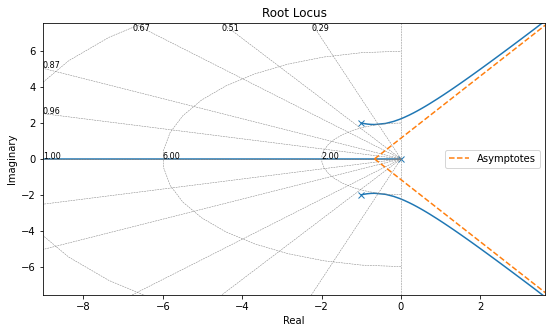

In [58]:
fig, ax = plt.subplots(figsize=(9, 5))

rlist, klist = ct.rlocus(P)

line1, = ax.plot([-0.667, 10], [0, (10 + 0.667)*np.tan(phi_A*np.pi/180)], \
                 linestyle='--', color='tab:orange', label='Asymptotes')
line2, = ax.plot([-0.667, 10], [0, -(10 + 0.667)*np.tan(phi_A*np.pi/180)], \
                 linestyle='--', color='tab:orange')

ax.legend(handles=[line1])

## b)

The angle of departure from the complex poles is found using the angle criterion
$$\angle F(s)=\sum_{i=1}^M \angle\left(s+z_i\right)-\sum_{k=1}^n \angle\left(s+p_k\right)=180^{\circ}+k 360^{\circ}$$

In [23]:
theta_1sym = sp.symbols('theta_1')
F = -(90 + (180-np.arctan(2)*180/np.pi) + theta_1sym)
theta_1 = sp.solve(F + 180, theta_1sym)[0]
eq_disp('\\theta_1', round(theta_1,2), '^\\circ')

<IPython.core.display.Latex object>

By symmetry the departure angle for the second complex pole is

In [24]:
theta_2 = -theta_1
eq_disp('\\theta_2', round(theta_2,2), '^\\circ')

<IPython.core.display.Latex object>

## c)

The transfer function is

In [25]:
s = sp.symbols('s')
T

K/(K + s*(s**2 + 2*s + 5))

Finding the coefficients

In [26]:
p, q = T.as_numer_denom()

coeffs = sp.Poly(q, s).coeffs()
eq_disp('q(s)', sp.Poly(q, s))
for i, k in enumerate(coeffs):
    display(Latex(f"${f's^{len(coeffs)-1-i}'}: {sp.latex(k)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Determining a Routh array to find the gain where the system will be marginally stable

In [27]:
arr = RHarray(coeffs)
arr

Matrix([
[      1, 5, 0, 0],
[      2, K, 0, 0],
[5 - K/2, 0, 0, 0],
[      K, 0, 0, 0]])

So when the two roots lie on the imaginary axis the gain is

In [28]:
K_mstable = sp.solve(arr[2,0], K)[0]
eq_disp('K', K_mstable)

<IPython.core.display.Latex object>

## d)

The root locus is already sketched in a):

In [29]:
fig, ax = plt.subplots(figsize=(9, 5))

rlist, klist = ct.rlocus(P)

# P7.5

## a)

In [28]:
s = ct.tf('s')
zeta = 0.707
G = 25*(s+0.03)/((s+0.4)*(s**2-0.36*s+0.16))
H = (s+1)/(s+9)
P = G*H
P

TransferFunction(array([25.  , 25.75,  0.75]), array([1.   , 9.04 , 0.376, 0.208, 0.576]))

We can draw a line that represents all points with the given damping ratio, by calculating the corresponding phase angle. We can the find the points where this ratio crosses the loci, which will then be the appropiate gain

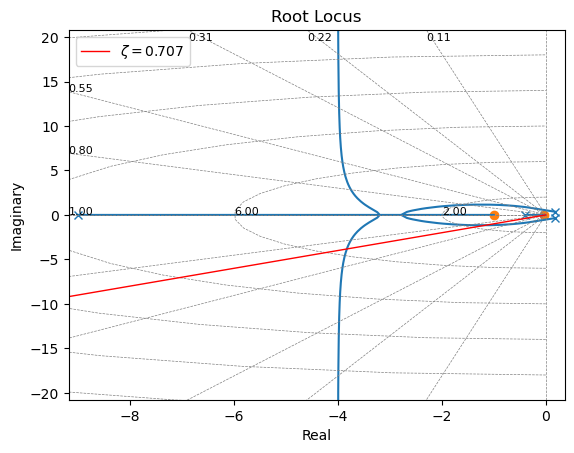

In [41]:
theta = np.arccos(zeta)
slope = np.sin(theta)/np.cos(theta) 
line = lambda x: x*slope
ax = plt.subplot()
rl = ct.rlocus(G*H, ax=ax)
span = np.r_[0:-100:-0.1]
handle = ax.plot(span, line(span), 'r', label=f'$\zeta={zeta}$', linewidth=1)
ax.legend(handles=handle)
plt.show()

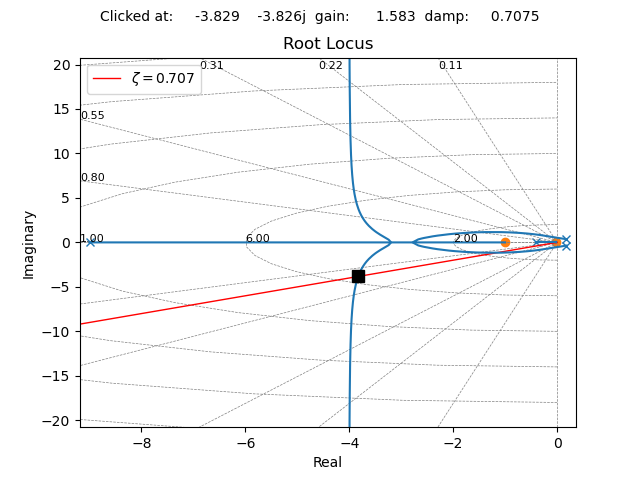

In [39]:
Image("plots/P7.5.png")

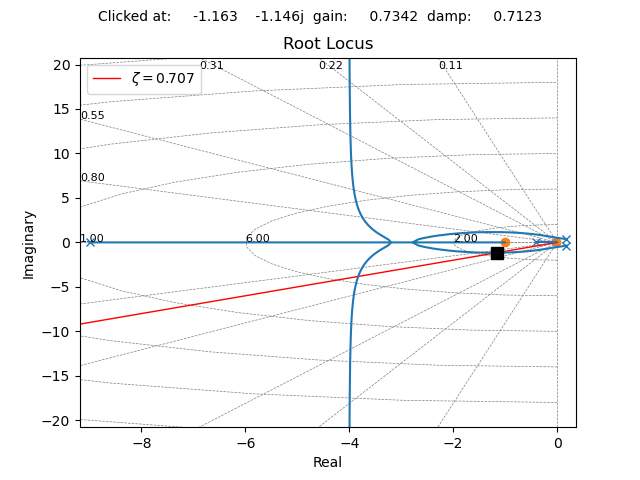

In [40]:
Image("plots/P7.5_2.png")

2 gains will result in the desired damping ratio:
$$K_2=0.7342$$
$$K_2=1.583$$

## b)

We calculate the steady state error for both of the possible gains $K_2$

In [64]:
K2_1 = 1.583
K2_2 = 0.7342
T_ho_1 = ct.feedback(G, K2_1*H)
T_ho_2 = ct.feedback(G, K2_2*H)
ct.dcgain(T_ho_1)  # calculates step input steady state error for system transferfunc

3.8281582305401956

In [65]:
ct.dcgain(T_ho_2)

5.991212887764611

## c)

In [67]:
Gp = 1/(s**2 + 12*s + 1)
T1 = ct.feedback(Gp*T_ho_1, 1)
T2 = ct.feedback(Gp*T_ho_2, 1)

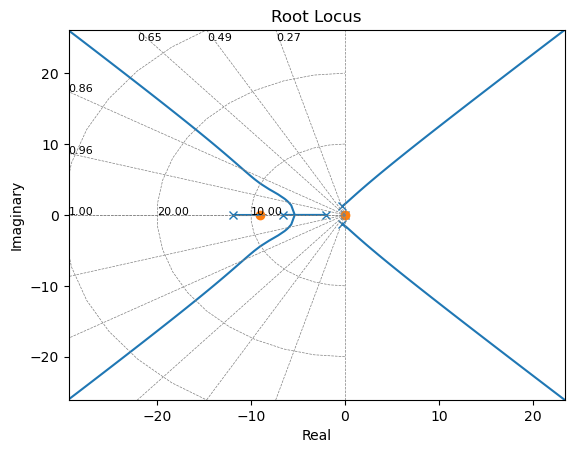

In [70]:
%matplotlib inline
rl = ct.rlocus(T2)

We chose a value that allows poles to be on left side of imagninary axis

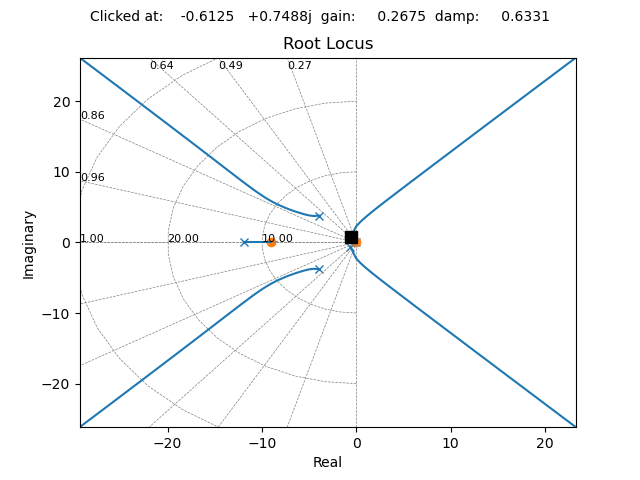

In [60]:
Image("plots/P7.5_3.png")

## d)

Steady state is recalcualted using $K_1 = 0.2675$

In [89]:
K1 = 0.2675
T = ct.feedback(T_ho_1, K1*Gp)
ct.dcgain(T)

1.8913523169065882